In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct
import causaldag
import matplotlib.pyplot as plt

#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

# CStree from Figure 1 in (Duarte & Solus, 2022)

/usr/local/Caskroom/miniconda/base/envs/cstrees/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
DEBUG:matplotlib:CACHEDIR=/Users/felix/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/felix/.matplotlib/fontlist-v330.json


In [2]:
np.random.seed(3)
p=4
cards = [2] * p
#co = ct.CausalOrder(range(p))
tree = ct.CStree(cards) # Maybe an optional label here. defaults to range(p)
#tree.set_cardinalities(cards)

# These do not have to be in a dict like this as the levels are
# determined from the length of the tuples.
tree.update_stages({
    -1: [ct.Stage([])],
    0: [],
    1: [ct.Stage([{0, 1}, 0])],    # Green
    2: [ct.Stage([0, {0, 1}, 0]),  # Blue
        ct.Stage([0, {0, 1}, 1]),  # Orange
        ct.Stage([1, {0, 1}, 0])]  # Red
})

tree.set_random_stage_parameters()
tree.create_tree()
tree.set_random_parameters()

a = tree.plot()
a.draw("testplot.png")
x = tree.sample(5)

print(x)

s = sc.score(tree, x, alpha_tot=1.0, method="K2")
print(s)
#rels = tree.csi_relations()

#print("Initial rels")
#print(rels)
adjmats = tree.to_minimal_context_graphs() # put labels here maybe

for key, graph in adjmats.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw(str(key) + "_csi.png", args='-Glabel="'+str(key)+'"   ')
a

No stage found for (1,)


AssertionError: 

In [3]:

p=4
cards = [2] * p 

DEBUG:root:getting csirels per level
DEBUG:root:{0: [<cstrees.cstree.Stage object at 0x7ff574153f40>], 1: [<cstrees.cstree.Stage object at 0x7ff562d24f40>, <cstrees.cstree.Stage object at 0x7ff574e44df0>], 2: [<cstrees.cstree.Stage object at 0x7ff562d32a60>, <cstrees.cstree.Stage object at 0x7ff562d32fa0>], 3: [], -1: [<cstrees.cstree.Stage object at 0x7ff561f327c0>]}
DEBUG:root:rels
DEBUG:root:{0: [<cstrees.cstree.CSI_relation object at 0x7ff574e5a250>], 1: [<cstrees.cstree.CSI_relation object at 0x7ff562d244f0>, <cstrees.cstree.CSI_relation object at 0x7ff562d24310>], 2: [<cstrees.cstree.CSI_relation object at 0x7ff562d32640>, <cstrees.cstree.CSI_relation object at 0x7ff562d325e0>], 3: [], -1: [<cstrees.cstree.CSI_relation object at 0x7ff562d323d0>]}
DEBUG:root:X0 ⊥  X1
DEBUG:root:X0 ⊥  X2, X1=0
DEBUG:root:X0 ⊥  X2, X1=1
DEBUG:root:X1, X2 ⊥  X3, X0=0
DEBUG:root:X1, X2 ⊥  X3, X0=1
DEBUG:root: ⊥  X0
DEBUG:root:###### paired_csis
DEBUG:root:[{(0, 1): [[None, None]]}, {(0, 2): [[None, {0

[[2 2 2 2]
 [1 0 0 1]
 [1 1 1 1]
 ...
 [1 0 0 1]
 [1 1 0 1]
 [1 1 0 1]]


DEBUG:root:level 2
DEBUG:root:##### Iterated through all levels. Prepare for next round. ### 
 
DEBUG:root:Adding the following newbies (just used for mixing) to the oldies.
DEBUG:root:[{0, 1}, None, {0, 1}, None]
DEBUG:root:CSI to absorb/remove after having been mixed (can be duplicates)
DEBUG:root:New mix results:
DEBUG:root:Updating mix results by removing if they already are in oldies, or a subset of an oldie.
DEBUG:root:newbies (new mixes after the filtering):
DEBUG:root:oldies
DEBUG:root:[{0, 1}, None, {0, 1}, None]
DEBUG:root:
#### Iteration 1
DEBUG:root:level 0
DEBUG:root:mixing
DEBUG:root:([{0}, {0, 1}, None, None], [{1}, {0, 1}, None, None])
DEBUG:root:mix result: 
DEBUG:root:[{0, 1}, {0, 1}, None, None]
DEBUG:root:Adding [{0, 1}, {0, 1}, None, None] as newly created ******
DEBUG:root:will later absorb [{0}, {0, 1}, None, None]
DEBUG:root:will later absorb [{1}, {0, 1}, None, None]
DEBUG:root:level 1
DEBUG:root:level 2
DEBUG:root:##### Iterated through all levels. Prepare for

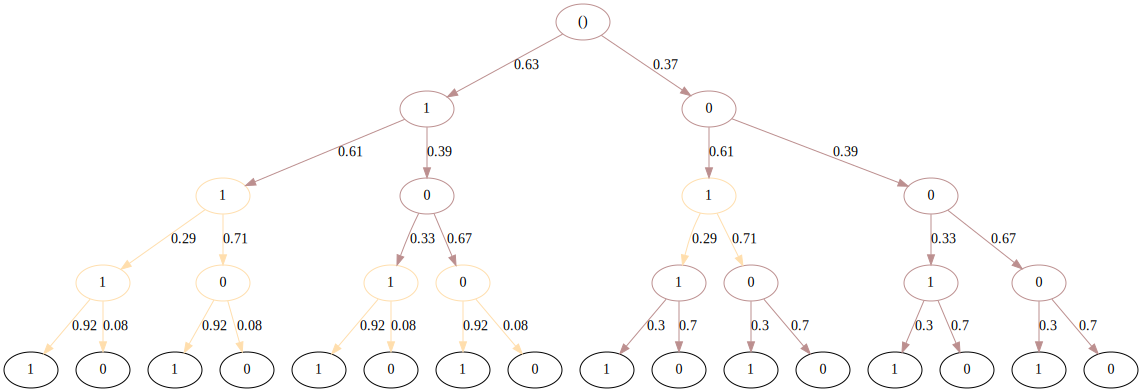

In [15]:
np.random.seed(5)

t = ct.sample_cstree(cards, max_cvars=1, prob_cvar=0.5, prop_nonsingleton=1)
t.set_random_stage_parameters()
t.create_tree()
t.set_random_parameters()
a = t.plot()
x = t.sample(1000)
print(x)
#plt.savefig("testplot.png")

true_cdags = t.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png", args='-Glabel="'+str(key)+'"   ')
a

Level 0
[{0, 1}] {0: 383, 1: 617}
Level 1
[{0, 1}, 0] {0: 282, 1: 101}
[{0, 1}, 1] {1: 173, 0: 444}
Level 2
[1, {0, 1}, {0, 1}] {1: 560, 0: 47}
[0, {0, 1}, {0, 1}] {0: 276, 1: 117}
Level 3
Level -1
[] {1: 607, 0: 393}


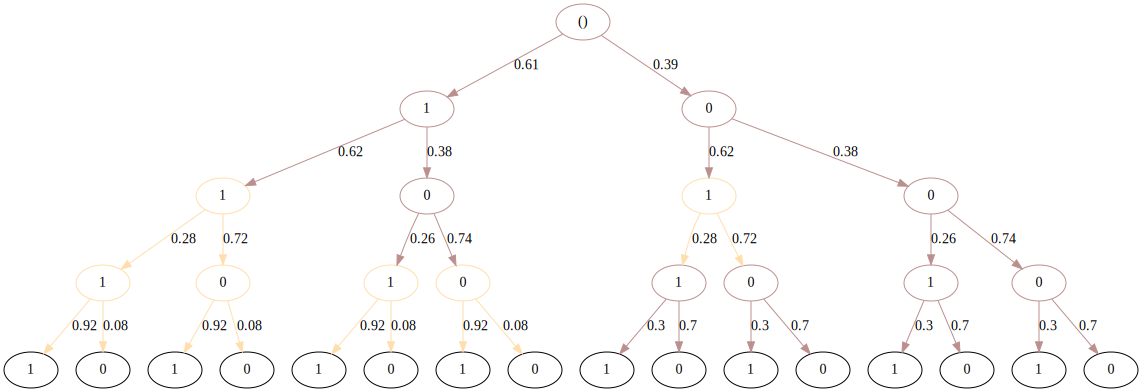

In [16]:
# Should we need to put order here? Or just the labels?
# Or nothing?
t.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
t.create_tree()
t.set_random_parameters()
a = t.plot()
a

In [17]:
order = [0, 1, 2]

perm = [1,0,2]
xperm = x[:, perm]

#order = [2,0, 1, 3]

s1 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
s2 = sc.score_order(perm, xperm, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s1)
print(s2)

AttributeError: module 'cstrees.cstree' has no attribute 'CausalOrder'

order: [0, 1, 2, 3], score: -15.824602117222359
order: [0, 1, 3, 2], score: -15.824602117222359
order: [0, 2, 1, 3], score: -15.691070724597836
order: [0, 2, 3, 1], score: -15.691070724597838
order: [0, 3, 1, 2], score: -15.824602117222359
order: [0, 3, 2, 1], score: -15.691070724597838
order: [1, 0, 2, 3], score: -15.824602117222359
order: [1, 0, 3, 2], score: -15.824602117222359
order: [1, 2, 0, 3], score: -15.691070724597836
order: [1, 2, 3, 0], score: -15.824602117222359
order: [1, 3, 0, 2], score: -15.824602117222359
order: [1, 3, 2, 0], score: -15.824602117222357
order: [2, 0, 1, 3], score: -15.691070724597836
order: [2, 0, 3, 1], score: -15.691070724597838
order: [2, 1, 0, 3], score: -15.691070724597836
order: [2, 1, 3, 0], score: -15.824602117222359
order: [2, 3, 0, 1], score: -15.824602117222359
order: [2, 3, 1, 0], score: -15.824602117222359
order: [3, 0, 1, 2], score: -15.824602117222359
order: [3, 0, 2, 1], score: -15.691070724597838
order: [3, 1, 0, 2], score: -15.82460211

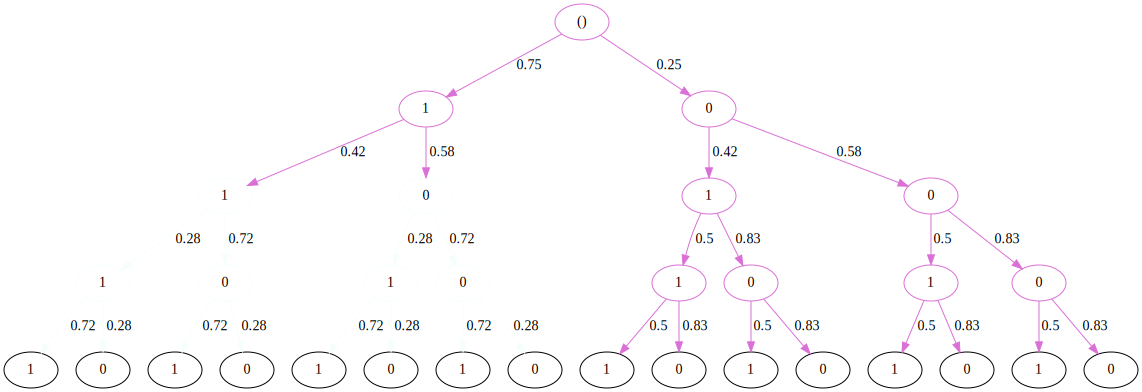

In [22]:
optord, score = ct.find_optimal_order(x, strategy="max", max_cvars=1, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [23]:
cdags = opttree.to_minimal_context_graphs()
for key, graph in cdags.items():
    print("key: {}".format(key))
    print(graph.edges())
    print(graph.nodes())
    cdag = causaldag.DAG(arcs=set(graph.edges()))
    cpdag = cdag.cpdag()

DEBUG:root:getting csirels per level
DEBUG:root:{0: [<cstrees.cstree.Stage object at 0x7f029ac56170>], 1: [<cstrees.cstree.Stage object at 0x7f029ac56710>, <cstrees.cstree.Stage object at 0x7f029ac56320>], 2: [<cstrees.cstree.Stage object at 0x7f029ac56c50>, <cstrees.cstree.Stage object at 0x7f029ac56980>], 3: [], -1: [<cstrees.cstree.Stage object at 0x7f029ac57e20>]}
DEBUG:root:rels
DEBUG:root:{0: [<cstrees.cstree.CSI_relation object at 0x7f029ac56e00>], 1: [<cstrees.cstree.CSI_relation object at 0x7f029ac560b0>, <cstrees.cstree.CSI_relation object at 0x7f029ac557b0>], 2: [<cstrees.cstree.CSI_relation object at 0x7f029ac558d0>, <cstrees.cstree.CSI_relation object at 0x7f029ac55c30>], 3: [], -1: [<cstrees.cstree.CSI_relation object at 0x7f029ac55d50>]}
DEBUG:root:X0 ⊥  X1
DEBUG:root:X1 ⊥  X2, X0=0
DEBUG:root:X1 ⊥  X2, X0=1
DEBUG:root:X1, X2 ⊥  X3, X0=0
DEBUG:root:X1, X2 ⊥  X3, X0=1
DEBUG:root: ⊥  X0
DEBUG:root:###### paired_csis
DEBUG:root:[{(0, 1): [[None, None]]}, {(1, 2): [[{0}, Non

key: None
[(0, 2), (0, 3)]
[0, 1, 2, 3]


max staging: ['[]']
max staging: ['[{0, 1}]']
max staging: ['[0, {0, 1}]', '[1, {0, 1}]']
max staging: ['[0, {0, 1}, {0, 1}]', '[1, {0, 1}, {0, 1}]']
Level 0
[{0, 1}] {0: 4, 1: 1}
Level 1
[1, {0, 1}] {0: 3, 1: 1}
[0, {0, 1}] {1: 1}
Level 2
[1, {0, 1}, {0, 1}] {1: 3, 0: 1}
[0, {0, 1}, {0, 1}] {0: 1}
Level 3
Level -1
[] {1: 4, 0: 1}


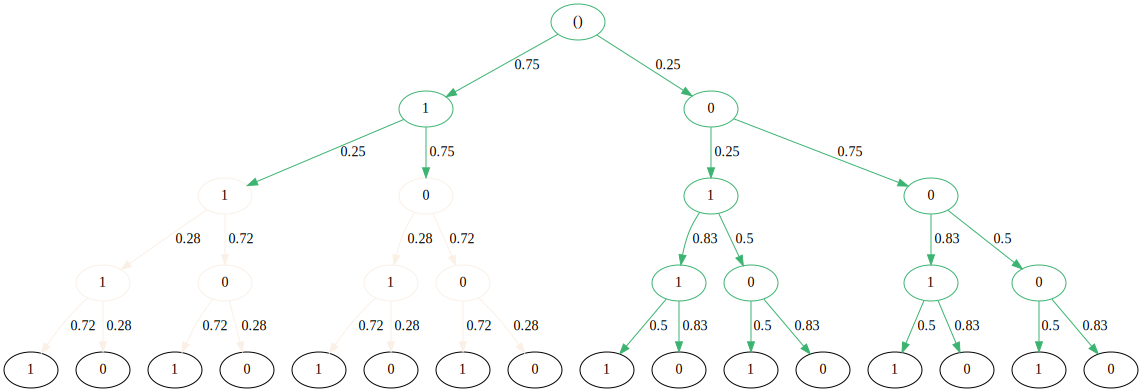

In [25]:
order = [0, 1, 2, 3]

opttree = ct.optimal_cstree(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
#print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [26]:
optord = ct.find_optimal_order(x, max_cvars=1, alpha_tot=1.0, method="BDeu")

order: [0, 1, 2, 3], score: -15.824602117222359
order: [0, 1, 3, 2], score: -15.824602117222359
order: [0, 2, 1, 3], score: -15.691070724597836
order: [0, 2, 3, 1], score: -15.691070724597838
order: [0, 3, 1, 2], score: -15.824602117222359
order: [0, 3, 2, 1], score: -15.691070724597838
order: [1, 0, 2, 3], score: -15.824602117222359
order: [1, 0, 3, 2], score: -15.824602117222359
order: [1, 2, 0, 3], score: -15.691070724597836
order: [1, 2, 3, 0], score: -15.824602117222359
order: [1, 3, 0, 2], score: -15.824602117222359
order: [1, 3, 2, 0], score: -15.824602117222357
order: [2, 0, 1, 3], score: -15.691070724597836
order: [2, 0, 3, 1], score: -15.691070724597838
order: [2, 1, 0, 3], score: -15.691070724597836
order: [2, 1, 3, 0], score: -15.824602117222359
order: [2, 3, 0, 1], score: -15.824602117222359
order: [2, 3, 1, 0], score: -15.824602117222359
order: [3, 0, 1, 2], score: -15.824602117222359
order: [3, 0, 2, 1], score: -15.691070724597838
order: [3, 1, 0, 2], score: -15.82460211

In [ ]:

order = [0, 1, 2, 3]
score = sc.score_order(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(score)
 

In [ ]:
stagings = ct.all_stagings(order, cards, level, max_cvars=1)
print("#Stagings")
nst = ct.n_stagings(order, cards, level, max_cvars=1)
print(nst)
print("Stagings")
for ss in stagings:
    for s in ss:
        print(s)

In [ ]:
for l in range(len(order)):
    max_staging, max_score = ct.optimal_staging_at_level(order, cards, x, l, max_cvars=1, alpha_tot=1.0, method="BDeu")
    print("best staging at level {}".format(l))
    print(max_score)   
    for st in max_staging:
        print(st)

    